In [1]:
import keras
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
#데이터셋 텍스트로 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

train_labels[10]

3

In [5]:
# 데이터 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

In [6]:
# 레이블 -> 벡터 : 원-핫 인코딩(범주형 인코딩)
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [7]:
# 모델 정의
from keras import models
from keras import layers

model = models.Sequential()
# 출력이 46클래스로 나뉘니까 유닛 갯수를 좀 더 크게 (64차원으로)
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
# softmax -> class[i]에 속할 확률 출력
model.add(layers.Dense(46, activation='softmax')) # 출력 클래스 갯수 46개

2022-03-17 19:42:40.332882: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-17 19:42:40.333023: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [8]:
# 모델 컴파일
model.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy', # 두 확률분포 사이의 거리 측정 -> 거리 최소화 => 진짜 레이블에 가까운 출력 내도록
             metrics= ['accuracy'])

In [9]:
# 검증 세트 준비
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
# 모델 훈련
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20


2022-03-17 19:42:40.928445: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-17 19:42:41.174992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 26ms/step - loss: 2.6348 - accuracy: 0.5154 - val_loss: 1.7614 - val_accuracy: 0.6370
Epoch 2/20
11/16 [===================>..........] - ETA: 0s - loss: 1.4959 - accuracy: 0.6946

2022-03-17 19:42:43.356153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 13ms/step - loss: 1.4279 - accuracy: 0.7078 - val_loss: 1.3086 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0484 - accuracy: 0.7786 - val_loss: 1.1325 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8313 - accuracy: 0.8245 - val_loss: 1.0347 - val_accuracy: 0.7950
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6669 - accuracy: 0.8569 - val_loss: 0.9897 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5357 - accuracy: 0.8893 - val_loss: 0.9444 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4327 - accuracy: 0.9089 - val_loss: 0.9099 - val_accuracy: 0.8110
Epoch 8/20
16/16 [==============================] - 0s 12ms/step - loss: 0.3523 - accuracy: 0.9265 - val_loss: 0.9118 - val_accuracy: 0.8170
Epoch 9/20
16/16 [======

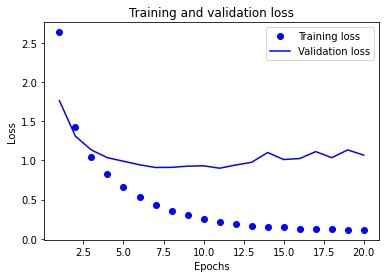

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

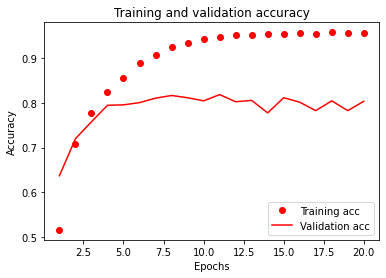

In [12]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
# 처음부터 다시 훈련..
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) 

model.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9, # 9번 이후 과대적합 시작 -> 9번 에포크로 줄이기
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
 6/16 [==========>...................] - ETA: 0s - loss: 3.3341 - accuracy: 0.4095

2022-03-17 19:42:47.785912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 24ms/step - loss: 2.6078 - accuracy: 0.5302 - val_loss: 1.7326 - val_accuracy: 0.6400
Epoch 2/9
11/16 [===================>..........] - ETA: 0s - loss: 1.4586 - accuracy: 0.7056

2022-03-17 19:42:48.206786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 12ms/step - loss: 1.4009 - accuracy: 0.7150 - val_loss: 1.2955 - val_accuracy: 0.7190
Epoch 3/9
16/16 [==============================] - 0s 12ms/step - loss: 1.0338 - accuracy: 0.7825 - val_loss: 1.1377 - val_accuracy: 0.7680
Epoch 4/9
16/16 [==============================] - 0s 12ms/step - loss: 0.8205 - accuracy: 0.8256 - val_loss: 1.0391 - val_accuracy: 0.7810
Epoch 5/9
16/16 [==============================] - 0s 12ms/step - loss: 0.6577 - accuracy: 0.8599 - val_loss: 0.9805 - val_accuracy: 0.7910
Epoch 6/9
16/16 [==============================] - 0s 12ms/step - loss: 0.5346 - accuracy: 0.8860 - val_loss: 0.9288 - val_accuracy: 0.8100
Epoch 7/9
16/16 [==============================] - 0s 12ms/step - loss: 0.4317 - accuracy: 0.9108 - val_loss: 0.9207 - val_accuracy: 0.8100
Epoch 8/9
16/16 [==============================] - 0s 12ms/step - loss: 0.3562 - accuracy: 0.9250 - val_loss: 0.9037 - val_accuracy: 0.8200
Epoch 9/9
71/71 [=============

In [14]:
results

[0.9796852469444275, 0.7827248573303223]

In [15]:
predictions= model.predict(x_test)

print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
0.9999998
3


2022-03-17 19:42:50.572201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [16]:
# 병목 모델
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu')) # 작은 중간층 -> 손실된 정보 많아짐
model.add(layers.Dense(46, activation='softmax')) 

model.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/20


2022-03-17 19:42:51.121361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 25ms/step - loss: 3.3737 - accuracy: 0.3503 - val_loss: 2.8959 - val_accuracy: 0.5650
Epoch 2/20
11/16 [===================>..........] - ETA: 0s - loss: 2.6743 - accuracy: 0.5803

2022-03-17 19:42:51.817095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 12ms/step - loss: 2.5833 - accuracy: 0.5852 - val_loss: 2.3094 - val_accuracy: 0.5970
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 2.0525 - accuracy: 0.6168 - val_loss: 1.9341 - val_accuracy: 0.6100
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 1.7183 - accuracy: 0.6382 - val_loss: 1.7269 - val_accuracy: 0.6220
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 1.5151 - accuracy: 0.6515 - val_loss: 1.5971 - val_accuracy: 0.6420
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 1.3800 - accuracy: 0.6611 - val_loss: 1.5191 - val_accuracy: 0.6540
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 1.2808 - accuracy: 0.6726 - val_loss: 1.4802 - val_accuracy: 0.6460
Epoch 8/20
16/16 [==============================] - 0s 12ms/step - loss: 1.1994 - accuracy: 0.6903 - val_loss: 1.4337 - val_accuracy: 0.6750
Epoch 9/20
16/16 [======